In [54]:
import pandas as pd
import xmltodict
input_path = './data/apple_health_export/export.xml'

with open(input_path, 'r') as xml_file:
    input_data = xmltodict.parse(xml_file.read())
    


In [56]:
records_list = input_data['HealthData']['Record']

In [57]:
df = pd.DataFrame(records_list)

In [59]:
df.columns

Index(['@type', '@sourceName', '@sourceVersion', '@unit', '@creationDate',
       '@startDate', '@endDate', '@value', 'MetadataEntry', '@device',
       'HeartRateVariabilityMetadataList'],
      dtype='object')

In [60]:
df['@type'].unique()

array(['HKQuantityTypeIdentifierHeight',
       'HKQuantityTypeIdentifierBodyMass',
       'HKQuantityTypeIdentifierHeartRate',
       'HKQuantityTypeIdentifierStepCount',
       'HKQuantityTypeIdentifierDistanceWalkingRunning',
       'HKQuantityTypeIdentifierBasalEnergyBurned',
       'HKQuantityTypeIdentifierActiveEnergyBurned',
       'HKQuantityTypeIdentifierFlightsClimbed',
       'HKQuantityTypeIdentifierAppleExerciseTime',
       'HKQuantityTypeIdentifierDistanceCycling',
       'HKQuantityTypeIdentifierRestingHeartRate',
       'HKQuantityTypeIdentifierWalkingHeartRateAverage',
       'HKQuantityTypeIdentifierEnvironmentalAudioExposure',
       'HKQuantityTypeIdentifierHeadphoneAudioExposure',
       'HKQuantityTypeIdentifierWalkingDoubleSupportPercentage',
       'HKQuantityTypeIdentifierAppleStandTime',
       'HKQuantityTypeIdentifierWalkingSpeed',
       'HKQuantityTypeIdentifierWalkingStepLength',
       'HKQuantityTypeIdentifierWalkingAsymmetryPercentage',
       'HKQuan

In [63]:
heart_rate = df[df['@type'] == 'HKQuantityTypeIdentifierHeartRate']
calories = df[(df['@type'] == 'HKQuantityTypeIdentifierBasalEnergyBurned') | (df['@type'] == 'HKQuantityTypeIdentifierActiveEnergyBurned')]
distance = df[(df['@type'] == 'HKQuantityTypeIdentifierDistanceWalkingRunning')]
distance_biking = df[(df['@type'] == 'HKQuantityTypeIdentifierDistanceCycling')]
walking_speed =  df[(df['@type'] == 'HKQuantityTypeIdentifierWalkingSpeed')]
walking_step_length =  df[(df['@type'] == 'HKQuantityTypeIdentifierWalkingStepLength')]
resting_heart_rate =  df[(df['@type'] == 'HKQuantityTypeIdentifierRestingHeartRate')]
walking_heart_rate =  df[(df['@type'] == 'HKQuantityTypeIdentifierWalkingHeartRateAverage')]
flights_climbed =  df[(df['@type'] == 'HKQuantityTypeIdentifierFlightsClimbed')]

format = '%Y-%m-%d %H:%M:%S %z'
df['@creationDate'] = pd.to_datetime(df['@creationDate'],
                                     format=format)
df['@creationDateOnly'] = df['@creationDate'].dt.date
df['@startDate'] = pd.to_datetime(df['@startDate'],
                                  format=format)
df['@endDate'] = pd.to_datetime(df['@endDate'],
                                format=format)
df['@startDateOnly'] = df['@startDate'].dt.date

In [79]:
pd.set_option('display.max_rows', 40)
calories[calories['@startDateOnly'] == pd.to_datetime('2020-04-05')].sort_values(['@type','@startDate'])


,@type,@sourceName,@sourceVersion,@unit,@creationDate,@startDate,@endDate,@value,MetadataEntry,@device,HeartRateVariabilityMetadataList,@creationDateOnly,@startDateOnly
519909,HKQuantityTypeIdentifierActiveEnergyBurned,Theodoreâ€™s AppleÂ Watch,6.1.3,Cal,2020-04-05 00:02:11-04:00,2020-04-05 00:00:03-04:00,2020-04-05 00:01:04-04:00,0.795,NaN,"<<HKDevice: 0x2809dc190>, name:Apple Watch, ma...",NaN,2020-04-05,2020-04-05
519910,HKQuantityTypeIdentifierActiveEnergyBurned,Theodoreâ€™s AppleÂ Watch,6.1.3,Cal,2020-04-05 00:02:11-04:00,2020-04-05 00:01:04-04:00,2020-04-05 00:01:56-04:00,0.285,NaN,"<<HKDevice: 0x2809dc190>, name:Apple Watch, ma...",NaN,2020-04-05,2020-04-05
519911,HKQuantityTypeIdentifierActiveEnergyBurned,Theodoreâ€™s AppleÂ Watch,6.1.3,Cal,2020-04-05 00:03:11-04:00,2020-04-05 00:01:56-04:00,2020-04-05 00:02:06-04:00,0.109,NaN,"<<HKDevice: 0x2809dc190>, name:Apple Watch, ma...",NaN,2020-04-05,2020-04-05
519912,HKQuantityTypeIdentifierActiveEnergyBurned,Theodoreâ€™s AppleÂ Watch,6.1.3,Cal,2020-04-05 10:48:58-04:00,2020-04-05 10:48:36-04:00,2020-04-05 10:48:46-04:00,0.049,NaN,"<<HKDevice: 0x2809dc190>, name:Apple Watch, ma...",NaN,2020-04-05,2020-04-05
519913,HKQuantityTypeIdentifierActiveEnergyBurned,Theodoreâ€™s AppleÂ Watch,6.1.3,Cal,2020-04-05 10:50:40-04:00,2020-04-05 10:48:46-04:00,2020-04-05 10:49:27-04:00,0.162,NaN,"<<HKDevice: 0x2809dc190>, name:Apple Watch, ma...",NaN,2020-04-05,2020-04-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
322700,HKQuantityTypeIdentifierBasalEnergyBurned,Theodoreâ€™s AppleÂ Watch,6.1.3,Cal,2020-07-05 10:28:12-04:00,2020-04-05 23:39:09-04:00,2020-04-05 23:44:20-04:00,6.163,"[{'@key': 'HKMetadataKeySyncVersion', '@value'...","<<HKDevice: 0x2809c6d50>, name:Apple Watch, ma...",NaN,2020-07-05,2020-04-05
322701,HKQuantityTypeIdentifierBasalEnergyBurned,Theodoreâ€™s AppleÂ Watch,6.1.3,Cal,2020-07-05 10:28:12-04:00,2020-04-05 23:44:20-04:00,2020-04-05 23:49:25-04:00,6.183,"[{'@key': 'HKMetadataKeySyncVersion', '@value'...","<<HKDevice: 0x2809c6d50>, name:Apple Watch, ma...",NaN,2020-07-05,2020-04-05
322702,HKQuantityTypeIdentifierBasalEnergyBurned,Theodoreâ€™s AppleÂ Watch,6.1.3,Cal,2020-07-05 10:28:12-04:00,2020-04-05 23:49:25-04:00,2020-04-05 23:54:30-04:00,6.188,"[{'@key': 'HKMetadataKeySyncVersion', '@value'...","<<HKDevice: 0x2809c6d50>, name:Apple Watch, ma...",NaN,2020-07-05,2020-04-05
322703,HKQuantityTypeIdentifierBasalEnergyBurned,Theodoreâ€™s AppleÂ Watch,6.1.3,Cal,2020-07-05 10:28:12-04:00,2020-04-05 23:54:30-04:00,2020-04-05 23:59:35-04:00,6.103,"[{'@key': 'HKMetadataKeySyncVersion', '@value'...","<<HKDevice: 0x2809c6d50>, name:Apple Watch, ma...",NaN,2020-07-05,2020-04-05


In [65]:
pd.set_option('display.max_rows', 15)
calories[calories['@value'] == 66.921]['@startDateOnly'].unique()

array([], dtype=object)

In [66]:
calories[calories['@startDateOnly'] == pd.to_datetime('2020-05-06')]

,@type,@sourceName,@sourceVersion,@unit,@creationDate,@startDate,@endDate,@value,MetadataEntry,@device,HeartRateVariabilityMetadataList,@creationDateOnly,@startDateOnly
307569,HKQuantityTypeIdentifierBasalEnergyBurned,Theodoreâ€™s AppleÂ Watch,6.1.3,Cal,2020-05-06 11:27:28-04:00,2020-05-06 00:01:05-04:00,2020-05-06 01:01:05-04:00,66.921,NaN,"<<HKDevice: 0x28098eb70>, name:Apple Watch, ma...",NaN,2020-05-06,2020-05-06
307570,HKQuantityTypeIdentifierBasalEnergyBurned,Theodoreâ€™s AppleÂ Watch,6.1.3,Cal,2020-05-06 11:27:28-04:00,2020-05-06 01:01:05-04:00,2020-05-06 02:01:05-04:00,66.921,NaN,"<<HKDevice: 0x28098eb70>, name:Apple Watch, ma...",NaN,2020-05-06,2020-05-06
307571,HKQuantityTypeIdentifierBasalEnergyBurned,Theodoreâ€™s AppleÂ Watch,6.1.3,Cal,2020-05-06 11:27:28-04:00,2020-05-06 02:01:05-04:00,2020-05-06 03:01:05-04:00,66.921,NaN,"<<HKDevice: 0x28098eb70>, name:Apple Watch, ma...",NaN,2020-05-06,2020-05-06
307572,HKQuantityTypeIdentifierBasalEnergyBurned,Theodoreâ€™s AppleÂ Watch,6.1.3,Cal,2020-05-06 11:27:28-04:00,2020-05-06 03:01:05-04:00,2020-05-06 04:01:05-04:00,66.921,NaN,"<<HKDevice: 0x28098eb70>, name:Apple Watch, ma...",NaN,2020-05-06,2020-05-06
307573,HKQuantityTypeIdentifierBasalEnergyBurned,Theodoreâ€™s AppleÂ Watch,6.1.3,Cal,2020-05-06 11:27:28-04:00,2020-05-06 04:01:05-04:00,2020-05-06 05:01:05-04:00,66.921,NaN,"<<HKDevice: 0x28098eb70>, name:Apple Watch, ma...",NaN,2020-05-06,2020-05-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540676,HKQuantityTypeIdentifierActiveEnergyBurned,Theodoreâ€™s AppleÂ Watch,6.1.3,Cal,2020-05-06 23:07:09-04:00,2020-05-06 23:06:08-04:00,2020-05-06 23:06:49-04:00,0.072,NaN,"<<HKDevice: 0x2809c6e90>, name:Apple Watch, ma...",NaN,2020-05-06,2020-05-06
540677,HKQuantityTypeIdentifierActiveEnergyBurned,Theodoreâ€™s AppleÂ Watch,6.1.3,Cal,2020-05-06 23:08:02-04:00,2020-05-06 23:06:49-04:00,2020-05-06 23:07:00-04:00,0.036,NaN,"<<HKDevice: 0x2809c6e90>, name:Apple Watch, ma...",NaN,2020-05-06,2020-05-06
540678,HKQuantityTypeIdentifierActiveEnergyBurned,Theodoreâ€™s AppleÂ Watch,6.1.3,Cal,2020-05-06 23:09:36-04:00,2020-05-06 23:07:00-04:00,2020-05-06 23:07:10-04:00,0.01,NaN,"<<HKDevice: 0x2809c6e90>, name:Apple Watch, ma...",NaN,2020-05-06,2020-05-06
540679,HKQuantityTypeIdentifierActiveEnergyBurned,Theodoreâ€™s AppleÂ Watch,6.1.3,Cal,2020-05-06 23:14:00-04:00,2020-05-06 23:09:44-04:00,2020-05-06 23:10:04-04:00,0.07,NaN,"<<HKDevice: 0x2809c6e90>, name:Apple Watch, ma...",NaN,2020-05-06,2020-05-06


In [68]:
heart_rate.loc[:, '@value'] = pd.to_numeric(
    heart_rate.loc[:, '@value'])
calories.loc[:, '@value'] = pd.to_numeric(
    calories.loc[:, '@value'])
distance.loc[:, '@value'] = pd.to_numeric(
    distance.loc[:, '@value'])
distance_biking.loc[:, '@value'] = pd.to_numeric(
    distance_biking.loc[:, '@value'])
walking_speed.loc[:, '@value'] = pd.to_numeric(
    walking_speed.loc[:, '@value'])
walking_step_length.loc[:, '@value'] = pd.to_numeric(
    walking_step_length.loc[:, '@value'])
resting_heart_rate.loc[:, '@value'] = pd.to_numeric(
    resting_heart_rate.loc[:, '@value'])
walking_heart_rate.loc[:, '@value'] = pd.to_numeric(
    walking_heart_rate.loc[:, '@value'])
flights_climbed.loc[:, '@value'] = pd.to_numeric(
    flights_climbed.loc[:, '@value'])

In [82]:
heart_rate.dtypes

@type                                                               object
@sourceName                                                         object
@sourceVersion                                                      object
@unit                                                               object
@creationDate                       datetime64[ns, pytz.FixedOffset(-240)]
@startDate                          datetime64[ns, pytz.FixedOffset(-240)]
@endDate                            datetime64[ns, pytz.FixedOffset(-240)]
@value                                                             float64
MetadataEntry                                                       object
@device                                                             object
HeartRateVariabilityMetadataList                                    object
@creationDateOnly                                                   object
@startDateOnly                                                      object
dtype: object

In [70]:
heart_rate_by_creation = heart_rate.groupby('@creationDate').sum()
heart_rate_by_creation
by_day = heart_rate_by_creation['@value'].resample('M').sum()
by_day


@creationDate
2020-02-29 00:00:00-04:00    2.587682e+05
2020-03-31 00:00:00-04:00    4.855404e+05
2020-04-30 00:00:00-04:00    3.856637e+05
2020-05-31 00:00:00-04:00    3.518274e+05
2020-06-30 00:00:00-04:00    4.585690e+05
2020-07-31 00:00:00-04:00    4.378552e+06
2020-08-31 00:00:00-04:00    2.913533e+06
2020-09-30 00:00:00-04:00    3.265240e+06
2020-10-31 00:00:00-04:00    1.159619e+05
Freq: M, Name: @value, dtype: float64

In [71]:
#pd.set_option('display.max_rows', None)
calories_by_creation = calories.groupby('@startDateOnly').sum()
calories_by_creation[([calories_by_creation['@value']>2500]) & ([calories_by_creation['@value']<3000])]

TypeError: unsupported operand type(s) for &: 'list' and 'list'

<AxesSubplot:xlabel='@startDateOnly'>

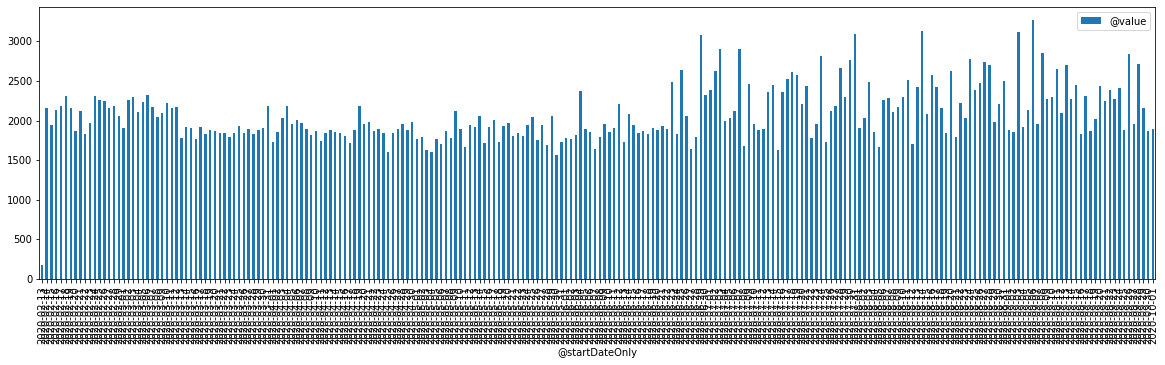

In [72]:
calories_by_creation.plot(kind='bar',figsize=(20,5))

In [81]:
calories_by_creation[calories_by_creation['@value']<1650]

,@value
@startDateOnly,
2020-02-13,178.503
2020-04-25,1601.542
2020-05-03,1628.819
2020-05-04,1606.104
2020-05-30,1559.843
2020-06-07,1645.007
2020-06-27,1643.688
2020-07-15,1625.691


<AxesSubplot:xlabel='@creationDate'>

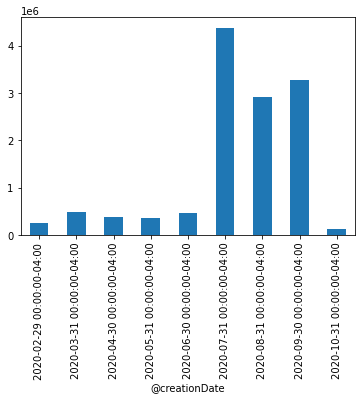

In [30]:
import calendar

by_day.plot(kind='bar')

In [31]:
heart_rate_by_creation.to_csv('out.csv')

In [ ]:
distance

In [ ]:
distance_by_day = distance.groupby('@startDateOnly').sum()
distance_by_day

<AxesSubplot:xlabel='@creationDateOnly'>

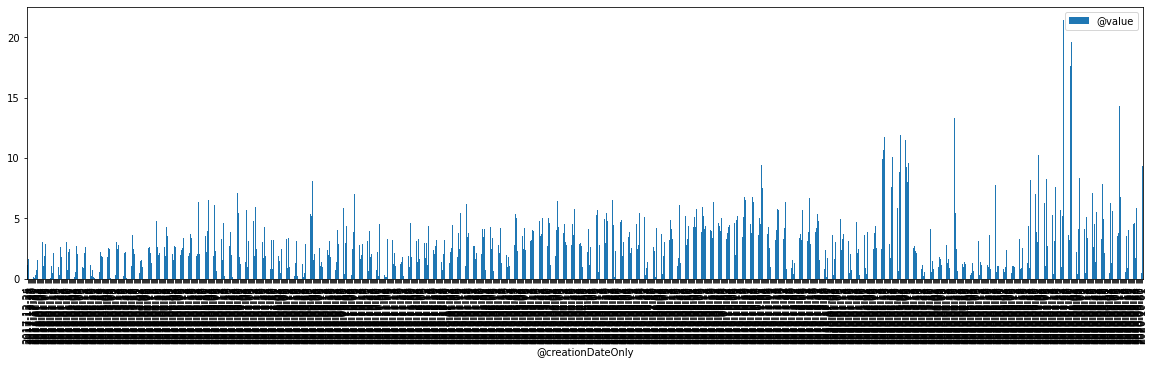

In [106]:
distance_by_day.plot(kind='bar',figsize=(20,5))

In [87]:
distance_biking_by_day = distance_biking.groupby('@startDateOnly').sum()
distance_biking_by_day

,@value
@creationDateOnly,
2020-05-14,0.674033
2020-05-17,0.952070
2020-05-20,1.116692
2020-06-14,1.765895
2020-06-25,0.061294
2020-08-07,16.246707
2020-08-12,5.310785
2020-08-18,9.952919
2020-08-19,4.575832


<AxesSubplot:xlabel='@creationDateOnly'>

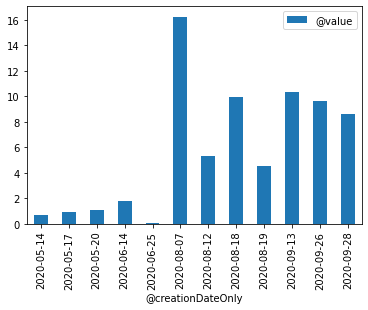

In [88]:
distance_biking_by_day.plot(kind='bar')

In [114]:
walking_speed.mean()

<ipython-input-114-2b37098446e5>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  walking_speed.mean()


@value                              2.927173
MetadataEntry                            NaN
HeartRateVariabilityMetadataList         NaN
dtype: float64

In [90]:
walking_step_length.mean()

<ipython-input-90-6c946ec5a505>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  walking_step_length.mean()


@value                              31.607022
MetadataEntry                             NaN
HeartRateVariabilityMetadataList          NaN
dtype: float64

In [91]:
walking_step_length.mean()

<ipython-input-91-6c946ec5a505>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  walking_step_length.mean()


@value                              31.607022
MetadataEntry                             NaN
HeartRateVariabilityMetadataList          NaN
dtype: float64

In [92]:
walking_heart_rate.mean()


<ipython-input-92-01706d0567b8>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  walking_heart_rate.mean()


@value                              106.182039
MetadataEntry                              NaN
@device                                    NaN
HeartRateVariabilityMetadataList           NaN
dtype: float64

In [93]:
resting_heart_rate.mean()


<ipython-input-93-e380c9efd988>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  resting_heart_rate.mean()


@value                              54.837004
MetadataEntry                             NaN
@device                                   NaN
HeartRateVariabilityMetadataList          NaN
dtype: float64

<AxesSubplot:xlabel='@creationDateOnly'>

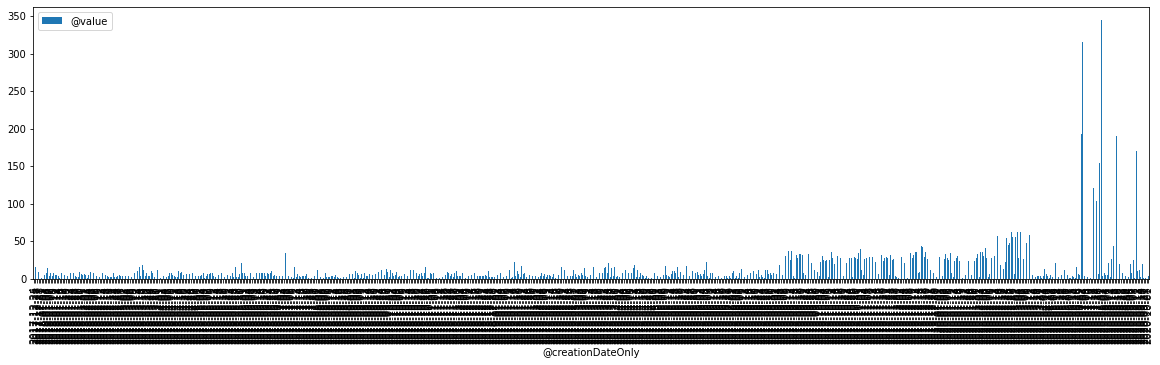

In [105]:
flights_climbed.groupby('@startDateOnly').sum().plot(kind='bar',figsize=(20,5))


In [23]:
calories[calories['@startDateOnly'] == '2020-05-05']

,@type,@sourceName,@sourceVersion,@unit,@creationDate,@startDate,@endDate,@value,MetadataEntry,@device,HeartRateVariabilityMetadataList,@creationDateOnly
